In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
import itertools

plt.rcParams['svg.fonttype'] = 'none'


In [2]:
def load_results(run_idx, model_name, train_name, fix_unit = 'ID', train_seq_part = 'fix_and_choice', choice_only = False, choice_then_fix = False):
    
    to_save_folder = '/scratch/gpfs/erussek/RNN_project/Best_Param_Results'
    res_name_full = 'run_{}_model_name_{}_train_name_{}_fix_and_sim_bp'.format(run_idx, model_name, train_name)
    
    if train_seq_part == 'fix_only':
        res_name_full = 'run_{}_model_name_{}_train_name_{}_fix_and_sim_bp_fix_only'.format(run_idx, model_name, train_name)
        
    if choice_only:
        res_name_full = 'run_{}_train_name_{}_choice_only'.format(run_idx, train_name)
    
    if choice_then_fix:
        res_name_full = 'run_{}_train_name_{}_choice_then_fix'.format(run_idx, train_name)

    if fix_unit == 'all':
        
        if train_seq_part == 'fix_only':
            res_name_full = 'run_{}_model_name_{}_train_name_{}_fix_and_sim_bp_fu_all'.format(run_idx, model_name, train_name)
        else:
            save_file_name = 'run_{}_model_name_{}_train_name_{}_fix_and_sim_bp_fu_all_fix_and_choice'.format(run_idx, model_name, train_name)

        
    res_file_name = res_name_full + '.pickle'    
    res_full_file_name = os.path.join(to_save_folder, res_file_name)
    file = open(res_full_file_name, 'rb')
    res = pickle.load(file)
    
    return res

def load_results_all_runs(model_name,train_name, fix_unit = 'ID', train_seq_part = 'fix_and_choice', choice_only = False, choice_then_fix = False, n_runs = 20):
    
    results_list = []
    
    for run_idx in range(n_runs):
        res = load_results(run_idx, model_name, train_name, train_seq_part = train_seq_part, choice_only = choice_only, choice_then_fix = choice_then_fix, fix_unit = fix_unit)
        results_list.append(res)
        
    return results_list

def get_learning_curve_train_sim_or_human(model_name, train_name, fix_unit = 'ID', n_runs = 20, choice_only = False, choice_then_fix = False, train_seq_part = 'fix_and_choice', which_loss = 'simulation_loss_results'): 
    
    results_list = load_results_all_runs(model_name,train_name, train_seq_part = train_seq_part, fix_unit = fix_unit, n_runs = n_runs, choice_then_fix = choice_then_fix, choice_only = choice_only)
    
    loss_results_by_run = np.array([res[which_loss] for res in results_list])
        
    return np.mean(loss_results_by_run, axis=0), np.std(loss_results_by_run, axis=0)/np.sqrt(n_runs), results_list[0]['train_sequence_number'], results_list[0]['simulation_sequence_number'], results_list[0]['human_sequence_number']

def get_correlation_results(model_name, train_name, fix_unit = 'ID',train_seq_part = 'fix_and_choice', choice_only = False, choice_then_fix = False, which_r_sim = 'r_sim_by_n_back', n_runs = 20):
    
    results_list = load_results_all_runs(model_name,train_name, train_seq_part = train_seq_part, fix_unit = fix_unit, n_runs = n_runs, choice_then_fix = choice_then_fix, choice_only = choice_only)
    
    r_by_n_back = np.array([res[which_r_sim] for res in results_list])
    
    return np.mean(r_by_n_back, axis=0), np.std(r_by_n_back, axis=0)/np.sqrt(n_runs)


def load_results_control(run_idx, fix_unit, d_model, sim_lr, human_lr, n_simulation_sequences_train, n_human_sequences_train, dropout):
    
    to_save_folder = '/scratch/gpfs/erussek/RNN_project/Control_Models1_HP'
    res_name_full = 'run_{}_fixunit_{}_d_model_{}_sim_lr_{}_human_lr_{}_nsim_{}_nhum_{}_do_{}'.format(run_idx, fix_unit, d_model, sim_lr, human_lr, n_simulation_sequences_train, n_human_sequences_train, dropout)

    param_dict = {'fix_unit': fix_unit, 'd_model':d_model, 'sim_lr':sim_lr, 'human_lr':human_lr, 'n_simulation_sequences_train':n_simulation_sequences_train, 'n_human_sequences_train':n_human_sequences_train, 'dropout': dropout}                  
    res_file_name = res_name_full + '.pickle'
    res_full_file_name = os.path.join(to_save_folder, res_file_name)
    file = open(res_full_file_name, 'rb')
    res = pickle.load(file)
    return res, param_dict

def load_results_all_runs_control(fix_unit, d_model, sim_lr, human_lr, n_simulation_sequences_train, n_human_sequences_train, dropout, n_runs = 20, choice_only = False):
    
    results_list = []
    
    for run_idx in range(n_runs):
        res, param_dict = load_results_control(run_idx, fix_unit, d_model, sim_lr, human_lr, n_simulation_sequences_train, n_human_sequences_train, dropout)
        results_list.append(res)
        
    return results_list, param_dict

def get_correlation_results_control(fix_unit, d_model, sim_lr, human_lr, n_simulation_sequences_train, n_human_sequences_train, dropout, which_r_sim = 'r_sim_by_n_back', n_runs = 20):
    
    results_list, param_dict = load_results_all_runs_control(fix_unit, d_model, sim_lr, human_lr, n_simulation_sequences_train, n_human_sequences_train, dropout, n_runs = n_runs)
        
    r_by_n_back = np.array([res[which_r_sim] for res in results_list])
    
    return np.mean(r_by_n_back, axis=0), np.std(r_by_n_back, axis=0)/np.sqrt(n_runs)

In [3]:
load_results(0, 'MLP', 'train_sim_test_sim', choice_only = True)
get_correlation_results('MLP', 'train_sim_test_sim', choice_only = True)

(0.4932572590220018, 0.0053099509828662276)

In [4]:
# types of models...
model_names = ['LSTM', 'GRU', 'Transformer']
train_names = ['train_sim_test_sim', 'train_sim_test_human', 'train_human_test_human', 'train_sim_human_test_human']




#### params for control model

In [5]:
c_sim_lr = .001
c_human_lr = .001
n_sim_seq = 5e5
n_human_seq = 5e5
c_dropout=0
c_d_model = 16

## Train on simulated data, test on simulated / Human data

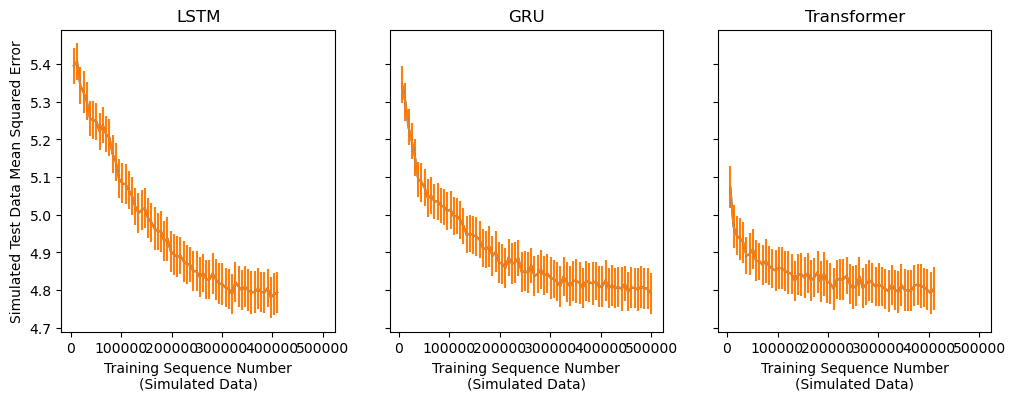

In [6]:
# Build the train on Sim jobs...

train_name = train_names[0]

fig,ax = plt.subplots(1,3, figsize = (12,4), dpi = 100, sharex = True, sharey = True)
for model_idx, model_name in enumerate(model_names):

    mean_loss, sem_loss, train_sequence_number, simulation_sequence_number, human_sequence_number = get_learning_curve_train_sim_or_human(model_name, train_name, n_runs = 20)                
    ax[model_idx].plot(train_sequence_number, mean_loss)
    ax[model_idx].errorbar(train_sequence_number, mean_loss, yerr=sem_loss)
    ax[model_idx].set_xlabel('Training Sequence Number\n(Simulated Data)');
    ax[model_idx].set_title(model_name)                        


ax[0].set_ylabel('Simulated Test Data Mean Squared Error');


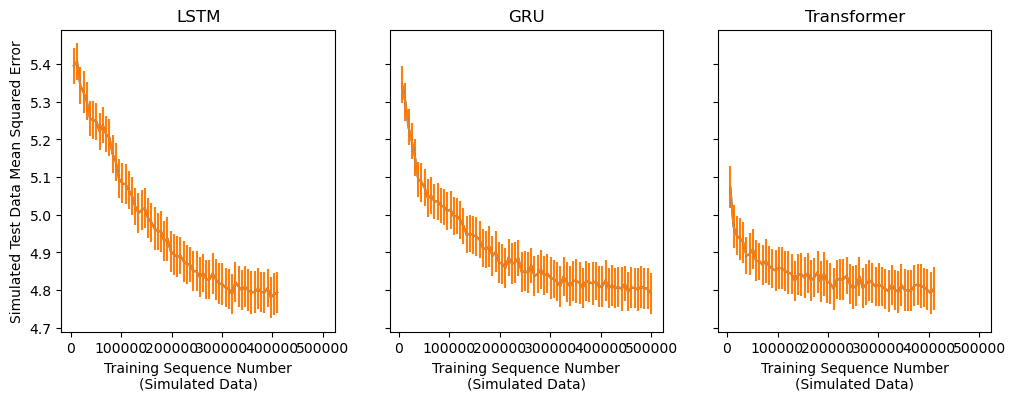

In [7]:
# Build the train on Sim jobs...

train_name = train_names[0]

fig,ax = plt.subplots(1,3, figsize = (12,4), dpi = 100, sharex = True, sharey = True)
for model_idx, model_name in enumerate(model_names):

    mean_loss, sem_loss, train_sequence_number, simulation_sequence_number, human_sequence_number = get_learning_curve_train_sim_or_human(model_name, train_name, fix_unit = 'all', n_runs = 20)                
    ax[model_idx].plot(train_sequence_number, mean_loss)
    ax[model_idx].errorbar(train_sequence_number, mean_loss, yerr=sem_loss)
    ax[model_idx].set_xlabel('Training Sequence Number\n(Simulated Data)');
    ax[model_idx].set_title(model_name)                        


ax[0].set_ylabel('Simulated Test Data Mean Squared Error');


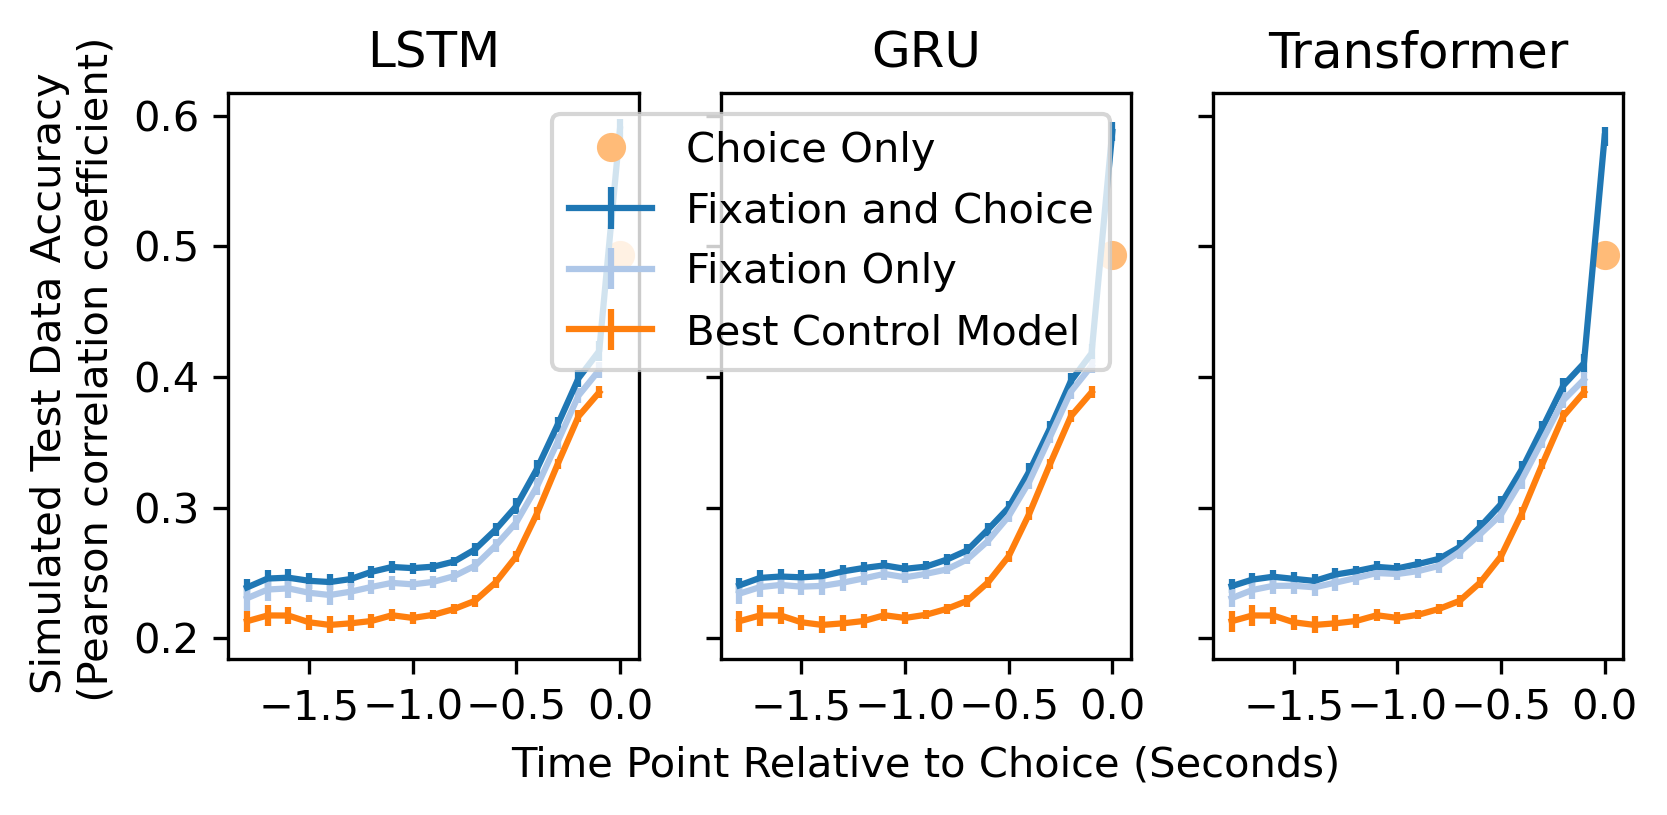

In [81]:
colors = plt.cm.tab20(range(4))


train_name = train_names[0]

fig,ax = plt.subplots(1,3, figsize = (6,2.5), dpi = 300, sharex = True, sharey = True)

for model_idx, model_name in enumerate(model_names):
    
    # general ID results sequential
    mn_r_by_n_back, sem_r = get_correlation_results(model_name, train_name, which_r_sim = 'r_sim_by_n_back', n_runs = 20)
    
    these_tps = np.arange(-18,1,1)/10
    # ax[model_idx].plot(these_tps,np.flip(mn_r_by_n_back), 'r-', label='fixations + choice')
    ax[model_idx].errorbar(these_tps,np.flip(mn_r_by_n_back), yerr = sem_r, label = 'Fixation and Choice'.format(model_name), color = colors[0])
    
    # 'fu' results
    # mn_r_by_n_back, sem_r = get_correlation_results(model_name, train_name, fix_unit = 'all', which_r_sim = 'r_sim_by_n_back', n_runs = 20)
    # these_tps = np.arange(-18,0,1)
    # ax[model_idx].plot(these_tps,np.flip(mn_r_by_n_back), 'r-', label='fixations + choice')
    # ax[model_idx].errorbar(these_tps,np.flip(mn_r_by_n_back), yerr = sem_r, label = '{}: All'.format(model_name))
    # ax[model_idx].errorbar(these_tps,np.flip(mn_r_by_n_back[:-1]), yerr = sem_r[:-1], label = '{}: all'.format(model_name))
    

    ax[model_idx].set_title(model_name)
    
    these_tps = np.arange(-18,0,1)/10
    mn_r_by_n_back, sem_r = get_correlation_results(model_name, train_name, train_seq_part = 'fix_only', which_r_sim = 'r_sim_by_n_back', n_runs = 20)
    ax[model_idx].errorbar(these_tps,np.flip(mn_r_by_n_back[:-1]), yerr = np.flip(sem_r[:-1]), label = 'Fixation Only'.format(model_name),  color = colors[1])

    # do the fix_only model...
    
    for fu in ['all']:#['ID', 'sum', 'prop', 'all']:
        mn_r_by_n_back_c, sem_r_c = get_correlation_results_control(fu, c_d_model, c_sim_lr, 0, 5e5, 0, c_dropout, which_r_sim = 'r_sim_by_n_back', n_runs = 20)
        ax[model_idx].errorbar(these_tps,np.flip(mn_r_by_n_back_c[:-1]), yerr = np.flip(sem_r_c[:-1]), label = 'Best Control Model',  color = colors[2])
    
    # choice then fix... 
    #mn_r_by_n_back_c, sem_r_c = get_correlation_results(model_name, train_name, which_r_sim = 'r_sim_by_n_back', choice_then_fix = True, n_runs = 20)
    #ax[model_idx].errorbar(these_tps,np.flip(mn_r_by_n_back_c), yerr = sem_r_c, label = 'Fix as choice')

    
        
    # get the choice only...
    mn_r_by_n_back, sem_r = get_correlation_results('MLP', train_name, which_r_sim = 'r_sim_by_n_back', n_runs = 20, choice_only = True)
    ax[model_idx].plot(0,mn_r_by_n_back,'o', label = 'Choice Only',  color = colors[3])
    
    ax[model_idx].set_xticks([-1.5, -1, -.5, 0])

    # x[model_idx].set_xticks([-1000, 0])
    # ax[model_idx].set_xlabel('Time point relative to choice', fontsize = 9)
    # ax[model_idx].set_yticklabels( fontsize = 9)


    # ax[model_idx].errorbar(0,mn_r_by_n_back,yerr = sem_r, label = 'Choice Only')

ax[1].legend()

ax[0].set_ylabel('Simulated Test Data Accuracy \n (Pearson correlation coefficient)');
ax[1].set_xlabel('Time Point Relative to Choice (Seconds)')



### Make the plot
plt.savefig("paper_figs/Train_Sim_Test_Sim_All_Models.svg", format='svg', transparent=True,  bbox_inches='tight',pad_inches=0)
plt.savefig("paper_figs/Train_Sim_Test_Sim_All_Models.png", format='png', transparent=True,  bbox_inches='tight',pad_inches=0)

### plot all the control models...


In [9]:
colors = matplotlib.cm.tab20(range(20))
markers = matplotlib.lines.Line2D.markers.keys()
x = np.linspace(0,1,100)

fig, axs = plt.subplots(2,4, figsize=(4*4,4*2))
for nlines,ax0 in zip(np.arange(5,21,5), axs.T):
    ax0[0].set_title('{:d} lines'.format(nlines))
    for n,c,m in zip(range(nlines),colors,markers):
        y = x*np.random.random()+np.random.random()
        ax0[0].plot(x,y)
        ax0[1].plot(x,y, marker=m, markevery=10)
axs[0,0].set_ylabel('only hues', fontsize=16, fontweight='bold')
axs[1,0].set_ylabel('hues+markers', fontsize=16, fontweight='bold')
fig.tight_layout()

NameError: name 'matplotlib' is not defined

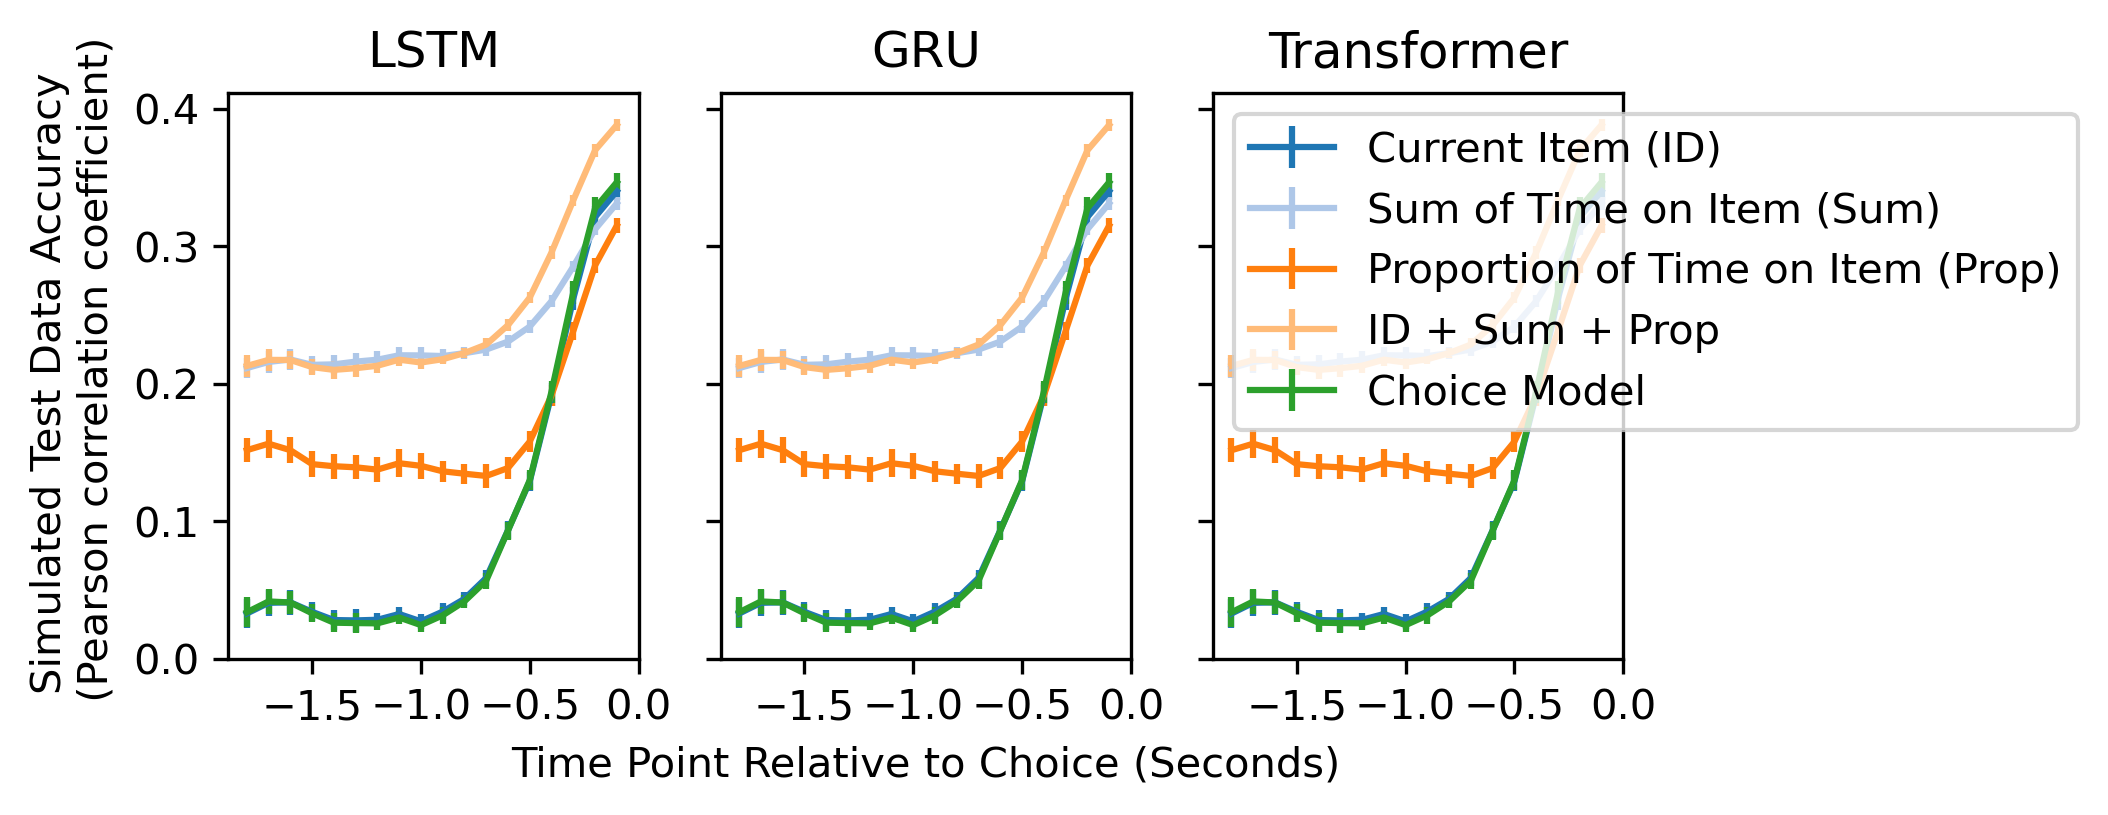

In [93]:
colors = plt.cm.tab20(range(5))
# markers = matplotlib.lines.Line2D.markers.keys()


train_name = train_names[0]

these_fu = ['ID', 'sum', 'prop', 'all']
fu_names = ['Current Item (ID)', 'Sum of Time on Item (Sum)', 'Proportion of Time on Item (Prop)', 'ID + Sum + Prop']

fig,ax = plt.subplots(1,3, figsize = (6,2.5), dpi = 300, sharex = True, sharey = True)

for model_idx, model_name in enumerate(model_names):
    
    
    # 'fu' results
    # mn_r_by_n_back, sem_r = get_correlation_results(model_name, train_name, fix_unit = 'all', which_r_sim = 'r_sim_by_n_back', n_runs = 20)
    # these_tps = np.arange(-18,0,1)
    # ax[model_idx].plot(these_tps,np.flip(mn_r_by_n_back), 'r-', label='fixations + choice')
    # ax[model_idx].errorbar(these_tps,np.flip(mn_r_by_n_back), yerr = sem_r, label = '{}: All'.format(model_name))
    # ax[model_idx].errorbar(these_tps,np.flip(mn_r_by_n_back[:-1]), yerr = sem_r[:-1], label = '{}: all'.format(model_name))
    

    ax[model_idx].set_title(model_name)
    
    these_tps = np.arange(-18,0,1)/10
    # do the fix_only model...
    
    for fu_idx, fu in enumerate(['ID', 'sum', 'prop', 'all']):
        mn_r_by_n_back_c, sem_r_c = get_correlation_results_control(fu, c_d_model, c_sim_lr, 0, 5e5, 0, c_dropout, which_r_sim = 'r_sim_by_n_back', n_runs = 20)
        ax[model_idx].errorbar(these_tps,np.flip(mn_r_by_n_back_c[:-1]), yerr = np.flip(sem_r_c[:-1]), label = fu_names[fu_idx], color = colors[fu_idx])
    
    # choice then fix... 
    mn_r_by_n_back_c, sem_r_c = get_correlation_results(model_name, train_name, which_r_sim = 'r_sim_by_n_back', choice_then_fix = True, n_runs = 20)
    ax[model_idx].errorbar(these_tps,np.flip(mn_r_by_n_back_c[:-1]), yerr = np.flip(sem_r_c[:-1]), label = 'Choice Model', color = colors[fu_idx+1])
    ax[model_idx].set_xticks([-1.5, -1, -.5, 0])



ax[2].legend()

# ax[0].set_ylim(0,.8)
ax[0].set_ylabel('Simulated Test Data Accuracy \n (Pearson correlation coefficient)');
ax[1].set_xlabel('Time Point Relative to Choice (Seconds)')


plt.savefig("paper_figs/Train_Sim_Test_Sim_All_Models_Control_Models.svg", format='svg', transparent=True,  bbox_inches='tight',pad_inches=0)
plt.savefig("paper_figs/Train_Sim_Test_Sim_All_Models_Control_Models.png", format='png', transparent=True,  bbox_inches='tight',pad_inches=0)


#### Make Figure 1 for Paper

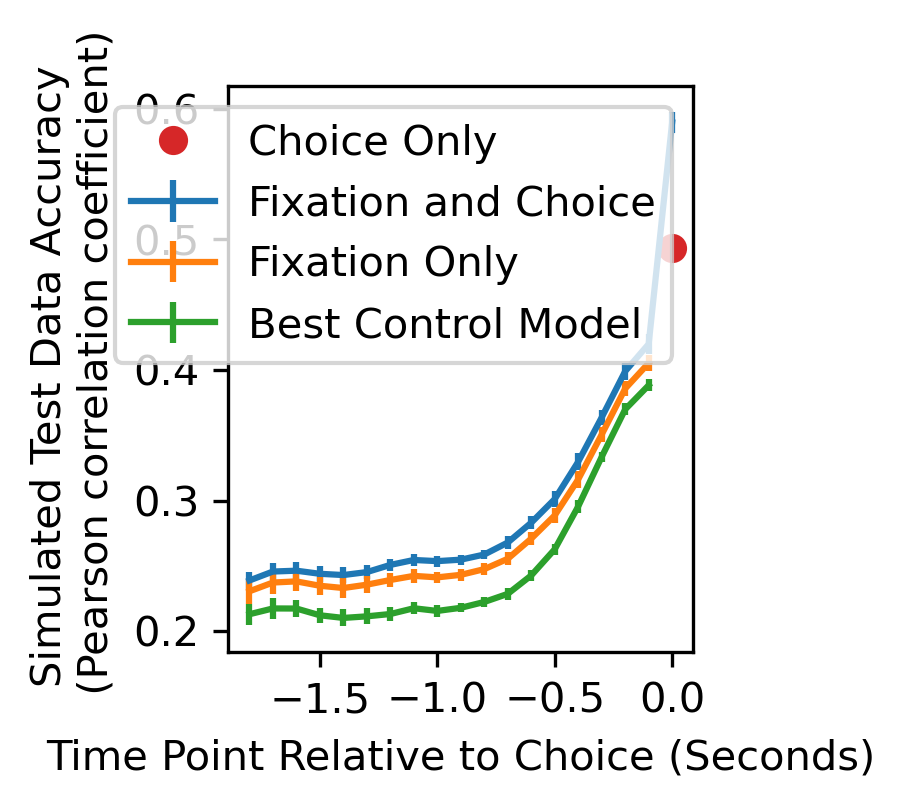

In [94]:
train_name = train_names[0]

fig,ax = plt.subplots(1,figsize = (6/3,2.5), dpi = 300, sharex = True, sharey = True)
ax.set_xlabel('Time Point Relative to Choice (Seconds)')
ax.set_ylabel('Simulated Test Data Accuracy \n (Pearson correlation coefficient)');

    
model_name = 'LSTM'

    
# Fixation and Choice Model
mn_r_by_n_back, sem_r = get_correlation_results(model_name, train_name, which_r_sim = 'r_sim_by_n_back', n_runs = 20)

these_tps = np.arange(-18,1,1)/10
ax.errorbar(these_tps,np.flip(mn_r_by_n_back), yerr = sem_r, label = 'Fixation and Choice'.format(model_name))


these_tps = np.arange(-18,0,1)/10
mn_r_by_n_back, sem_r = get_correlation_results(model_name, train_name, train_seq_part = 'fix_only', which_r_sim = 'r_sim_by_n_back', n_runs = 20)
ax.errorbar(these_tps,np.flip(mn_r_by_n_back[:-1]), yerr = np.flip(sem_r[:-1]), label = 'Fixation Only'.format(model_name))

# do the fix_only model...

fu = 'all'
mn_r_by_n_back_c, sem_r_c = get_correlation_results_control(fu, c_d_model, c_sim_lr, 0, 5e5, 0, c_dropout, which_r_sim = 'r_sim_by_n_back', n_runs = 20)
ax.errorbar(these_tps,np.flip(mn_r_by_n_back_c[:-1]), yerr = np.flip(sem_r_c[:-1]), label = 'Best Control Model')


# choice then fix... 
#mn_r_by_n_back_c, sem_r_c = get_correlation_results(model_name, train_name, which_r_sim = 'r_sim_by_n_back', choice_then_fix = True, n_runs = 20)
#ax[model_idx].errorbar(these_tps,np.flip(mn_r_by_n_back_c), yerr = sem_r_c, label = 'Fix as choice')


# get the choice only...
mn_r_by_n_back, sem_r = get_correlation_results('MLP', train_name, which_r_sim = 'r_sim_by_n_back', n_runs = 20, choice_only = True)
ax.plot(0,mn_r_by_n_back,'o', label = 'Choice Only')
ax.set_xticks([-1.5, -1, -.5, 0])

ax.legend()

# save this figure...
### Make the plot
plt.savefig("paper_figs/Train_Sim_Test_Sim_LSTM.svg", format='svg', transparent=True,  bbox_inches='tight',pad_inches=0)
plt.savefig("paper_figs/Train_Sim_Test_Sim_LSTM.png", format='png', transparent=True,  bbox_inches='tight',pad_inches=0)


In [27]:
mn_r_by_n_back, sem_r = get_correlation_results(model_name, train_name, fix_unit = 'all', which_r_sim = 'r_sim_by_n_back', n_runs = 20)
np.flip(mn_r_by_n_back)[:-1]

array([0.23993171, 0.2449407 , 0.24714839, 0.24550869, 0.24393129,
       0.24877911, 0.25141384, 0.25467281, 0.25353141, 0.25688356,
       0.26077497, 0.26983297, 0.2854294 , 0.30275412, 0.32924367,
       0.36109227, 0.39341126, 0.41051704])

## Train on simulated data, test on Human data

#### Results for train human / test human and train both

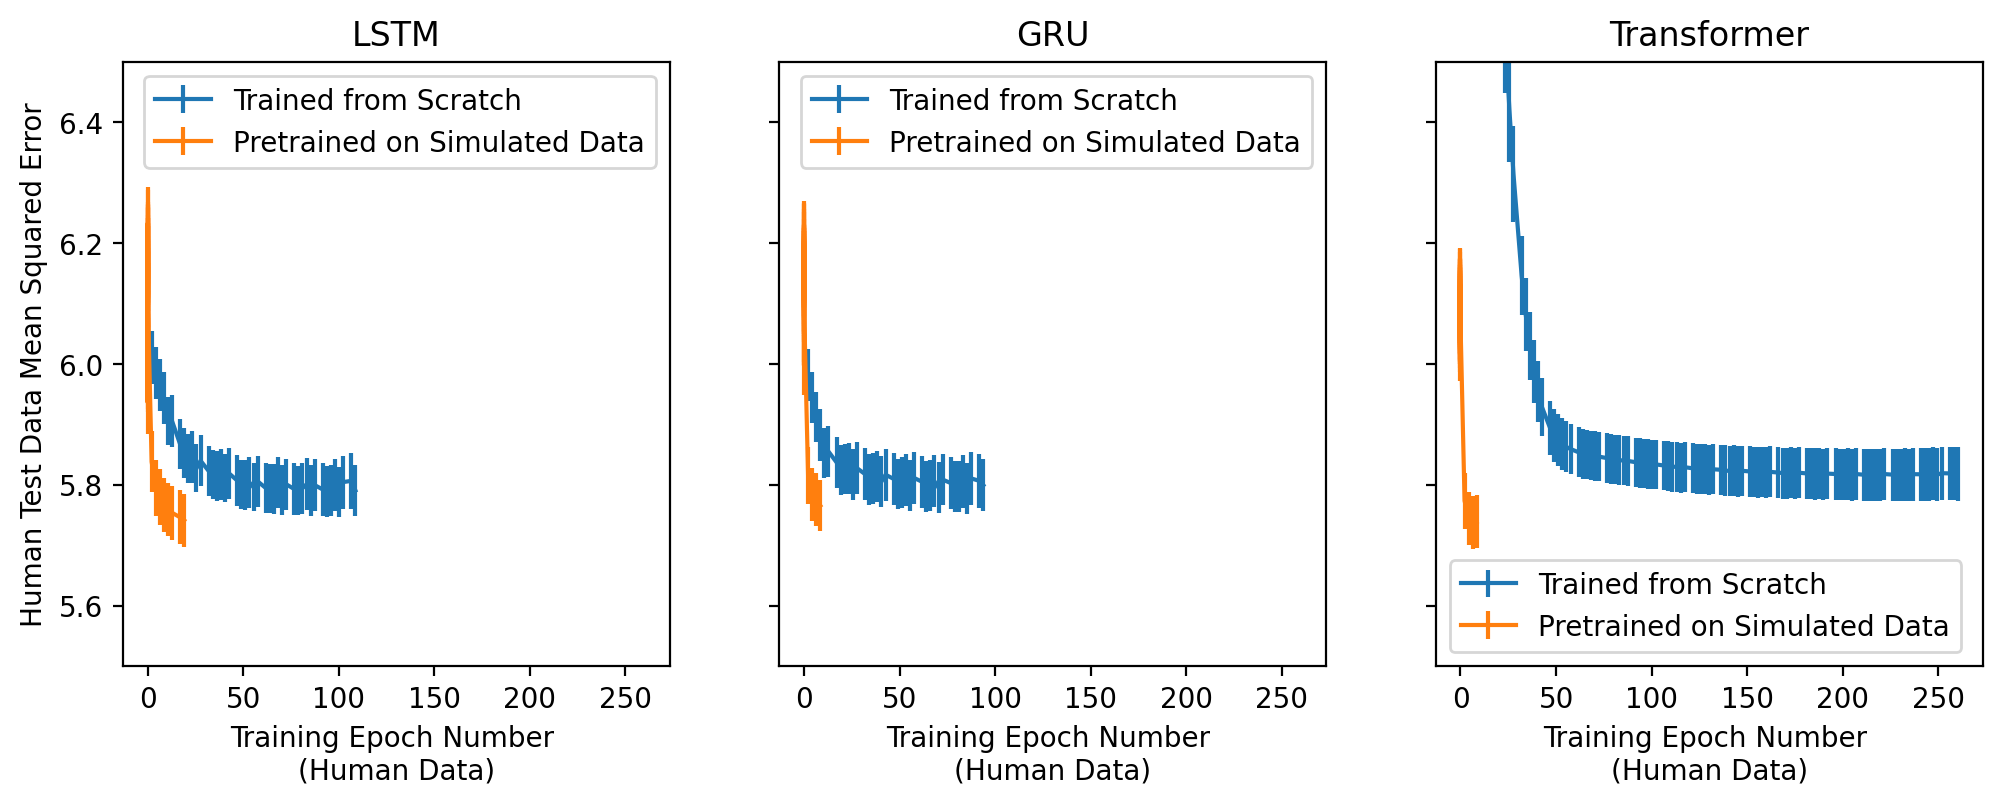

In [13]:
fig,ax = plt.subplots(1,3, figsize = (12,4), dpi = 200, sharex = True, sharey = True)

labels = ['Trained from Scratch', 'Pretrained on Simulated Data']
for t_idx,train_name in enumerate(train_names[2:4]):

    for model_idx, model_name in enumerate(model_names):

        mean_loss, sem_loss, train_sequence_number, simulation_sequence_number, human_sequence_number = get_learning_curve_train_sim_or_human(model_name, train_name, which_loss = 'human_loss_results', n_runs = 20)                
        # ax[model_idx].plot(train_sequence_number, mean_loss)
        human_epoch_number = human_sequence_number / 3000
        ax[model_idx].errorbar(human_epoch_number, mean_loss, yerr=sem_loss, label = labels[t_idx])
        ax[model_idx].set_xlabel('Training Epoch Number \n(Human Data)');
        ax[model_idx].set_title(model_name)                        
        ax[model_idx].set_ylim(5.5,6.5)
        ax[model_idx].legend()
        
    ax[0].set_ylabel('Human Test Data Mean Squared Error');

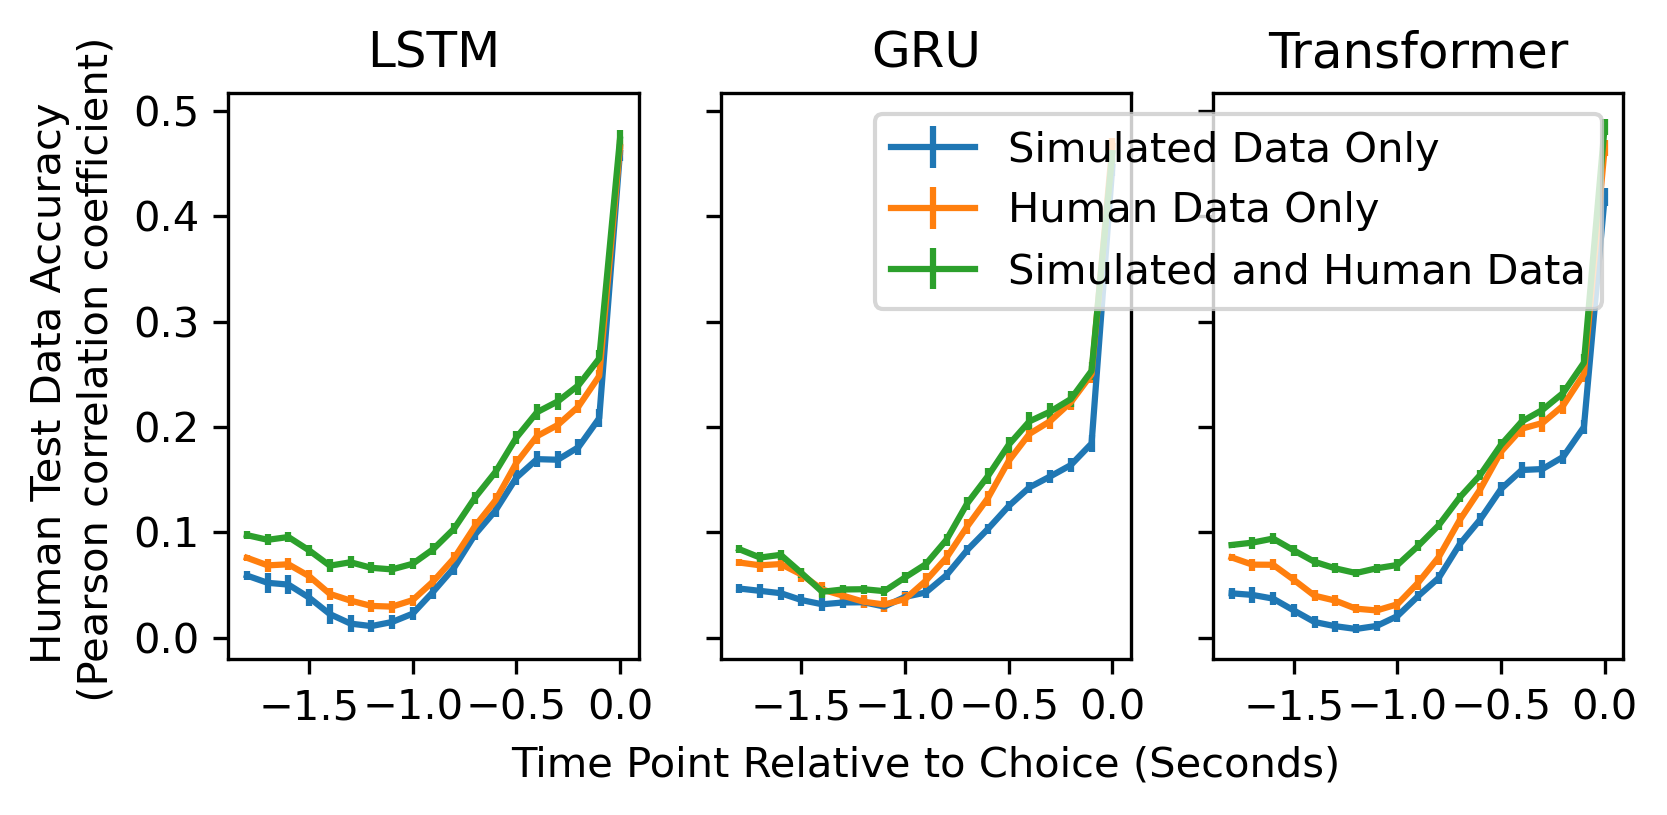

In [102]:
# colors = plt.cm.tab20(range(3))

fig,ax = plt.subplots(1,3, figsize = (6,2.5), dpi = 300, sharex = True, sharey = True)

train_labels = ['Simulated Data Only', 'Human Data Only', 'Simulated and Human Data']

for train_idx, train_name in enumerate(train_names[1:]):

    for model_idx, model_name in enumerate(model_names):
        mn_r_by_n_back, sem_r = get_correlation_results(model_name, train_name, which_r_sim = 'r_human_by_n_back', n_runs = 20)

        these_tps = np.arange(-18,1,1)/10
        #ax[model_idx].plot(these_tps,np.flip(mn_r_by_n_back), label='fixations + choice')
        ax[model_idx].errorbar(these_tps,np.flip(mn_r_by_n_back), yerr=sem_r, label = train_labels[train_idx])

        ax[model_idx].set_title(model_name)
        
        ax[model_idx].set_xticks([-1.5, -1, -.5, 0])

        # ax[model_idx].legend()
        
        these_tps = np.arange(-18,0,1)
        #for fu in ['ID', 'sum', 'prop']:
        #    mn_r_by_n_back_c, sem_r_c = get_correlation_results_control(fu, c_d_model, c_sim_lr, 0, 5e5, 0, c_dropout, which_r_sim = 'r_human_by_n_back', n_runs = 20)
        #    ax[model_idx].errorbar(these_tps,np.flip(mn_r_by_n_back_c)[:-1], yerr = sem_r_c[:-1], label = 'MLP: '+fu)
ax[2].legend()

ax[0].set_ylabel('Human Test Data Accuracy \n (Pearson correlation coefficient)');
ax[1].set_xlabel('Time Point Relative to Choice (Seconds)')

plt.savefig("paper_figs/Test_Human_Compare_Pretrain_All_Models.svg", format='svg', transparent=True,  bbox_inches='tight',pad_inches=0)
plt.savefig("paper_figs/Test_Human_Compare_Pretrain_All_Models.png", format='png', transparent=True,  bbox_inches='tight',pad_inches=0)

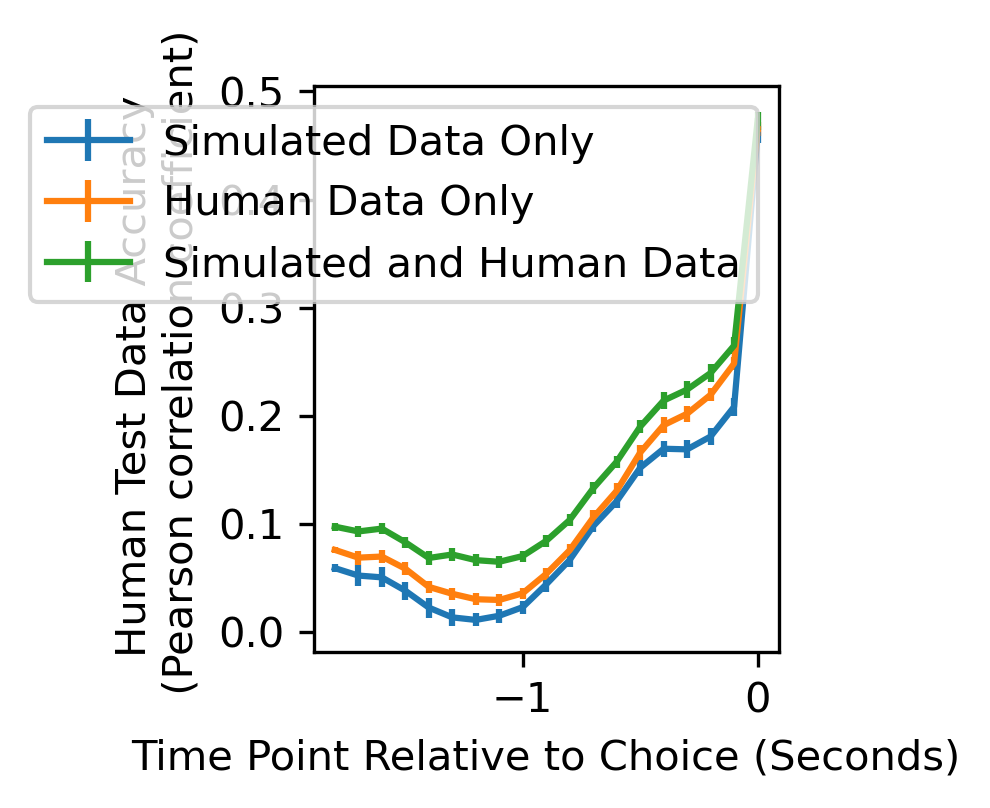

In [106]:
fig,ax = plt.subplots(1, figsize = (2,2.5), dpi = 300, sharex = True, sharey = True)

train_labels = ['Simulated Data Only', 'Human Data Only', 'Simulated and Human Data']

for train_idx, train_name in enumerate(train_names[1:]):

    for model_idx, model_name in enumerate(['LSTM']):
        mn_r_by_n_back, sem_r = get_correlation_results(model_name, train_name, which_r_sim = 'r_human_by_n_back', n_runs = 20)

        these_tps = np.arange(-18,1,1)/10
        #ax[model_idx].plot(these_tps,np.flip(mn_r_by_n_back), label='fixations + choice')
        ax.errorbar(these_tps,np.flip(mn_r_by_n_back), yerr=sem_r, label = train_labels[train_idx])



ax.legend()
ax.set_xlabel('Time Point Relative to Choice (Seconds)')
ax.set_ylabel('Human Test Data Accuracy \n (Pearson correlation coefficient)');
plt.savefig("paper_figs/Test_Human_Compare_Pretrain_LSTM.svg", format='svg', transparent=True,  bbox_inches='tight',pad_inches=0)
plt.savefig("paper_figs/Test_Human_Compare_Pretrain_LSTM.png", format='png', transparent=True,  bbox_inches='tight',pad_inches=0)

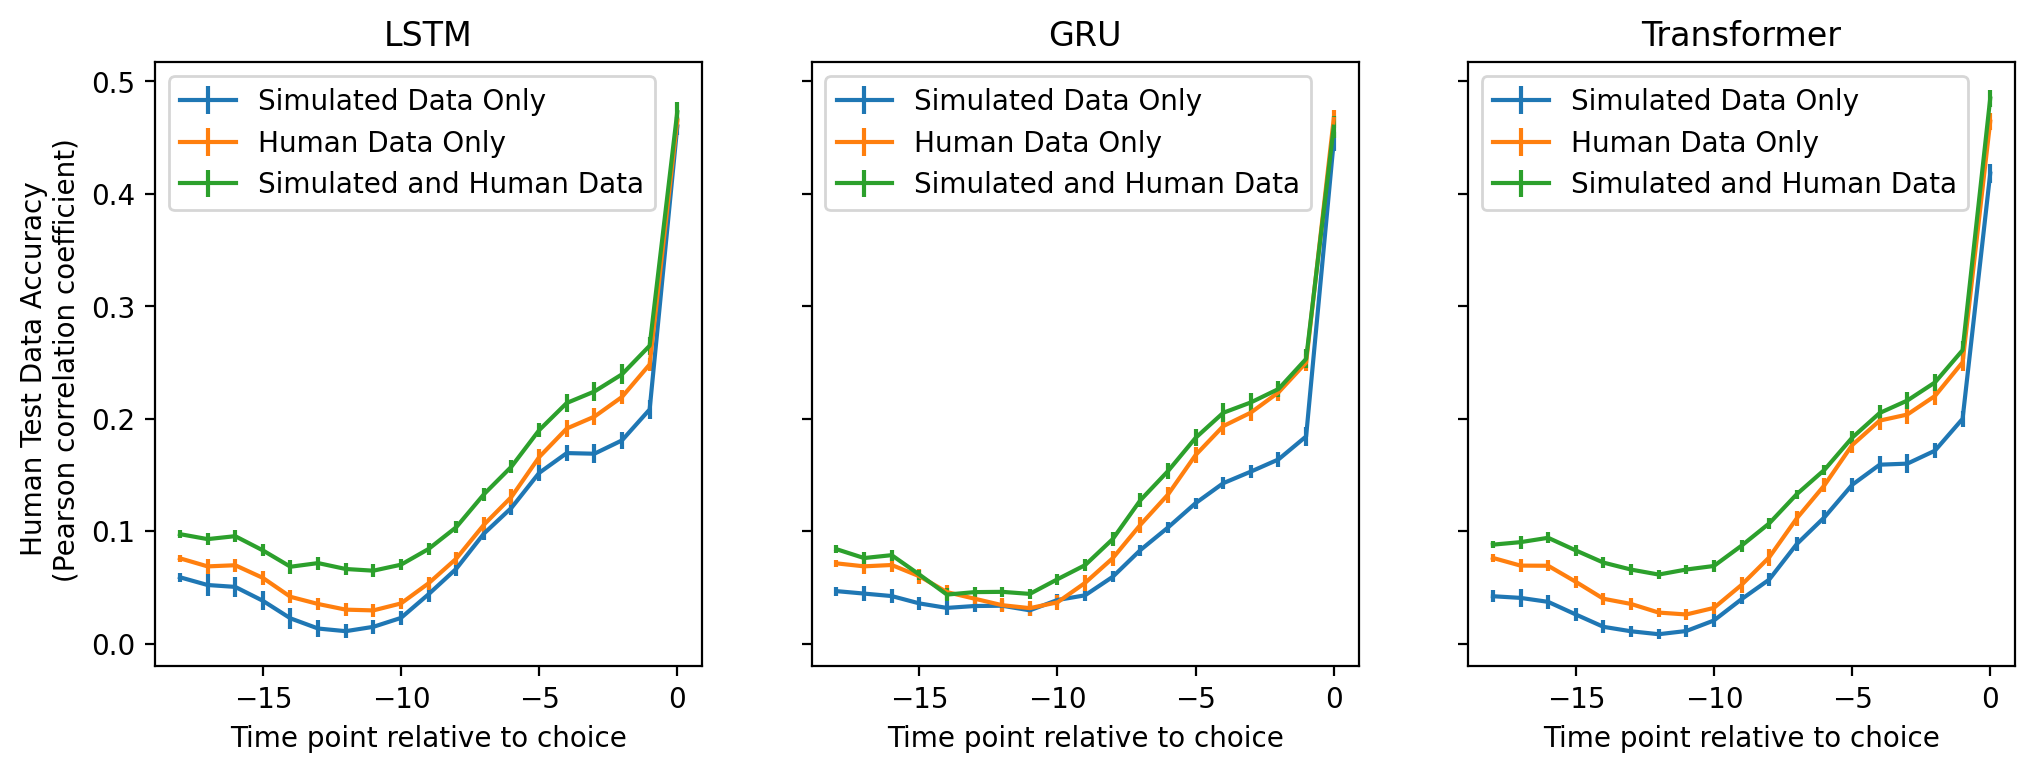

In [15]:
fig,ax = plt.subplots(1,3, figsize = (12,4), dpi = 200, sharex = True, sharey = True)

train_labels = ['Simulated Data Only', 'Human Data Only', 'Simulated and Human Data']

for train_idx, train_name in enumerate(train_names[1:]):

    for model_idx, model_name in enumerate(model_names):
        mn_r_by_n_back, sem_r = get_correlation_results(model_name, train_name, fix_unit = 'all', which_r_sim = 'r_human_by_n_back', n_runs = 20)

        these_tps = np.arange(-18,1,1)
        #ax[model_idx].plot(these_tps,np.flip(mn_r_by_n_back), label='fixations + choice')
        ax[model_idx].errorbar(these_tps,np.flip(mn_r_by_n_back), yerr=sem_r, label = train_labels[train_idx])

        ax[model_idx].set_title(model_name)
        ax[model_idx].set_xlabel('Time point relative to choice')
        # ax[model_idx].legend()
        
        these_tps = np.arange(-18,0,1)
        #for fu in ['ID', 'sum', 'prop']:
        #    mn_r_by_n_back_c, sem_r_c = get_correlation_results_control(fu, c_d_model, c_sim_lr, 0, 5e5, 0, c_dropout, which_r_sim = 'r_human_by_n_back', n_runs = 20)
        #    ax[model_idx].errorbar(these_tps,np.flip(mn_r_by_n_back_c)[:-1], yerr = sem_r_c[:-1], label = 'MLP: '+fu)
        ax[model_idx].legend()

    ax[0].set_ylabel('Human Test Data Accuracy \n (Pearson correlation coefficient)');


Seq Choice Time Pred:  0.4725932401036691
Choice only pred:  0.4667760381978884
Seq Choice Time Pred:  0.4596921371752698
Choice only pred:  0.4667760381978884
Seq Choice Time Pred:  0.48477940177734863
Choice only pred:  0.4667760381978884


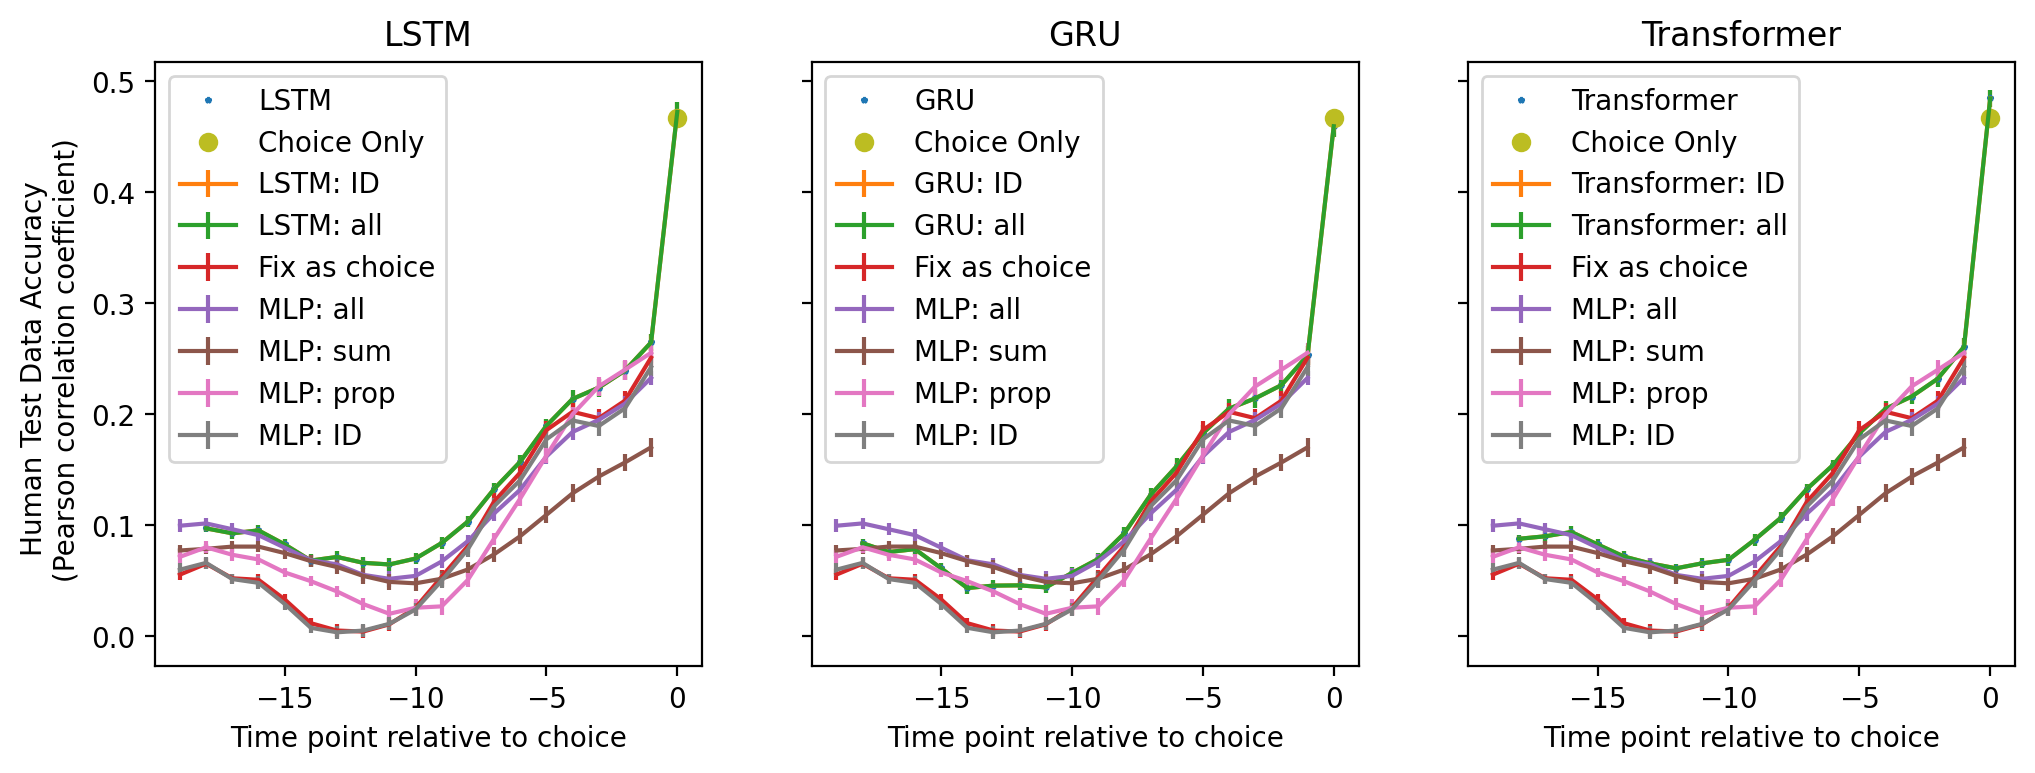

In [35]:
fig,ax = plt.subplots(1,3, figsize = (12,4), dpi = 200, sharex = True, sharey = True)

train_labels = ['Simulated Data Only', 'Human Data Only', 'Simulated and Human Data']

for train_idx, train_name in enumerate(train_names[3:]):

    for model_idx, model_name in enumerate(model_names):
        mn_r_by_n_back, sem_r = get_correlation_results(model_name, train_name, which_r_sim = 'r_human_by_n_back', n_runs = 20)
        
        print('Seq Choice Time Pred: ', mn_r_by_n_back[0])

        these_tps = np.arange(-18,1,1)
        ax[model_idx].plot(these_tps,np.flip(mn_r_by_n_back), '*', ms=2, label=model_name)
        ax[model_idx].errorbar(these_tps,np.flip(mn_r_by_n_back), yerr=sem_r,  label = '{}: ID'.format(model_name))
        
        
        # 'fu' results
        mn_r_by_n_back, sem_r = get_correlation_results(model_name, train_name, fix_unit = 'all', which_r_sim = 'r_human_by_n_back', n_runs = 20)
        these_tps = np.arange(-18,1,1)
        # ax[model_idx].plot(these_tps,np.flip(mn_r_by_n_back), 'r-', label='fixations + choice')
        ax[model_idx].errorbar(these_tps,np.flip(mn_r_by_n_back), yerr = sem_r, label = '{}: all'.format(model_name))
        

        # choice then fix... 
        these_tps = np.arange(-19,0,1)
        mn_r_by_n_back_c, sem_r_c = get_correlation_results(model_name, train_name, which_r_sim = 'r_human_by_n_back', choice_then_fix = True, n_runs = 20)
        ax[model_idx].errorbar(these_tps,np.flip(mn_r_by_n_back_c), yerr = sem_r_c, label = 'Fix as choice')

        ax[model_idx].set_title(model_name)
        ax[model_idx].set_xlabel('Time point relative to choice')
        # ax[model_idx].legend()
        
        these_tps = np.arange(-19,0,1)
        for fu in ['all', 'sum', 'prop', 'ID']:
            mn_r_by_n_back_c, sem_r_c = get_correlation_results_control(fu, c_d_model, 0, .001, 0, 5e5, c_dropout, which_r_sim = 'r_human_by_n_back', n_runs = 20)
            ax[model_idx].errorbar(these_tps,np.flip(mn_r_by_n_back_c), yerr = sem_r_c, label = 'MLP: '+fu)
            
        # get the choice only...
        mn_r_by_n_back, sem_r = get_correlation_results('MLP', train_name, which_r_sim = 'r_human_by_n_back', n_runs = 20, choice_only = True, choice_then_fix = False)
        ax[model_idx].plot(0,mn_r_by_n_back,'o', label = 'Choice Only')
        ax[model_idx].errorbar(0,mn_r_by_n_back,yerr = sem_r)
        print('Choice only pred: ', mn_r_by_n_back)
        
        

        
for i in range(3):
    ax[i].legend()

    ax[0].set_ylabel('Human Test Data Accuracy \n (Pearson correlation coefficient)');


Choice only pred:  0.4667760381978884
Choice only pred:  0.4667760381978884
Choice only pred:  0.4667760381978884


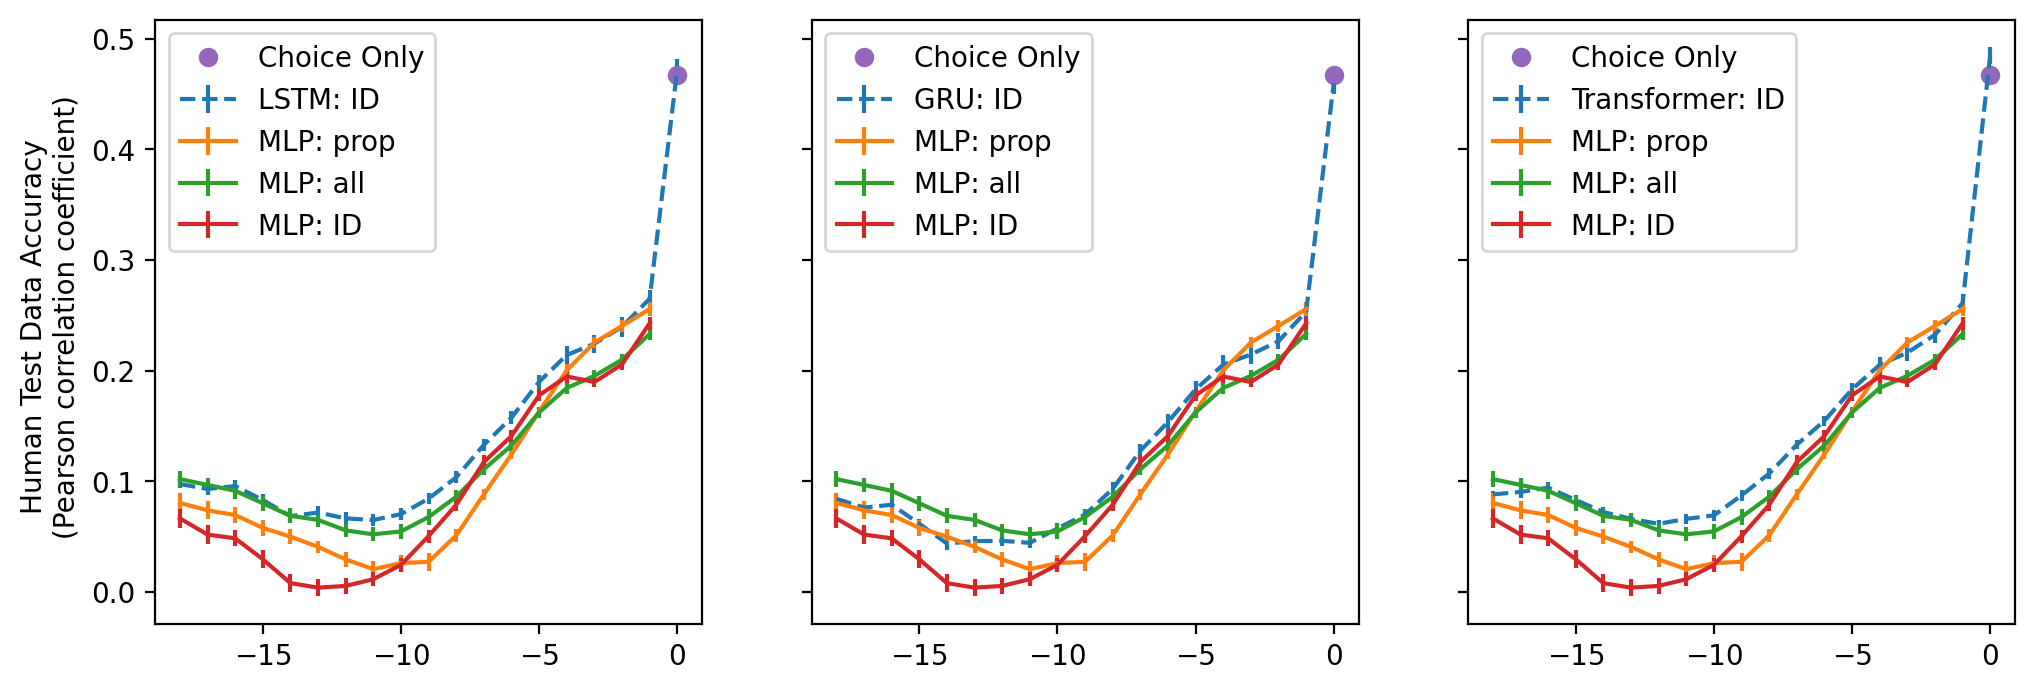

In [58]:
fig,ax = plt.subplots(1,3, figsize = (12,4), dpi = 200, sharex = True, sharey = True)

train_labels = ['Simulated Data Only', 'Human Data Only', 'Simulated and Human Data']

for train_idx, train_name in enumerate(train_names[3:]):

    for model_idx, model_name in enumerate(model_names):
        mn_r_by_n_back, sem_r = get_correlation_results(model_name, train_name, which_r_sim = 'r_human_by_n_back', n_runs = 20)

        these_tps = np.arange(-18,1,1)
        # ax[model_idx].plot(these_tps,np.flip(mn_r_by_n_back), '*', ms=2, label=model_name)
        ax[model_idx].errorbar(these_tps,np.flip(mn_r_by_n_back), yerr=sem_r, ls = '--', label = '{}: ID'.format(model_name))
        
        
        these_tps = np.arange(-18,0,1)
        for fu in ['prop', 'all', 'ID']:#['all', 'sum', 'prop', 'ID']:
            mn_r_by_n_back_c, sem_r_c = get_correlation_results_control(fu, c_d_model, 0, .001, 0, 5e5, c_dropout, which_r_sim = 'r_human_by_n_back', n_runs = 20)
            ax[model_idx].errorbar(these_tps,np.flip(mn_r_by_n_back_c[:-1]), yerr = np.flip(sem_r_c[:-1]), label = 'MLP: '+fu)
            
        # get the choice only...
        mn_r_by_n_back, sem_r = get_correlation_results('MLP', train_name, which_r_sim = 'r_human_by_n_back', n_runs = 20, choice_only = True, choice_then_fix = False)
        ax[model_idx].plot(0,mn_r_by_n_back,'o', label = 'Choice Only')
        ax[model_idx].errorbar(0,mn_r_by_n_back,yerr = sem_r)
        print('Choice only pred: ', mn_r_by_n_back)
        
        
for i in range(3):
    ax[i].legend()

    ax[0].set_ylabel('Human Test Data Accuracy \n (Pearson correlation coefficient)');

In [24]:
mn_r_by_n_back, sem_r = get_correlation_results('MLP', train_name, which_r_sim = 'r_human_by_n_back', n_runs = 20, choice_only = True, choice_then_fix = False)
mn_r_by_n_back

/tmp/ipykernel_267767/2849888417.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  r_by_n_back = np.array([res[which_r_sim] for res in results_list])


array([0.45751064, 0.45456373, 0.45394355, 0.45358877, 0.45283603,
       0.44973606, 0.44930771, 0.4471656 , 0.44517606, 0.44462797,
       0.4440606 , 0.44269235, 0.44442507, 0.44745804, 0.44803902,
       0.446703  , 0.44621953, 0.44665856, 0.44718041])

In [22]:
mn_r_by_n_back

array([0.45751064, 0.45456373, 0.45394355, 0.45358877, 0.45283603,
       0.44973606, 0.44930771, 0.4471656 , 0.44517606, 0.44462797,
       0.4440606 , 0.44269235, 0.44442507, 0.44745804, 0.44803902,
       0.446703  , 0.44621953, 0.44665856, 0.44718041])

In [20]:
mn_r_by_n_back

array([0.45751064, 0.45456373, 0.45394355, 0.45358877, 0.45283603,
       0.44973606, 0.44930771, 0.4471656 , 0.44517606, 0.44462797,
       0.4440606 , 0.44269235, 0.44442507, 0.44745804, 0.44803902,
       0.446703  , 0.44621953, 0.44665856, 0.44718041])

(0.32, 0.75)

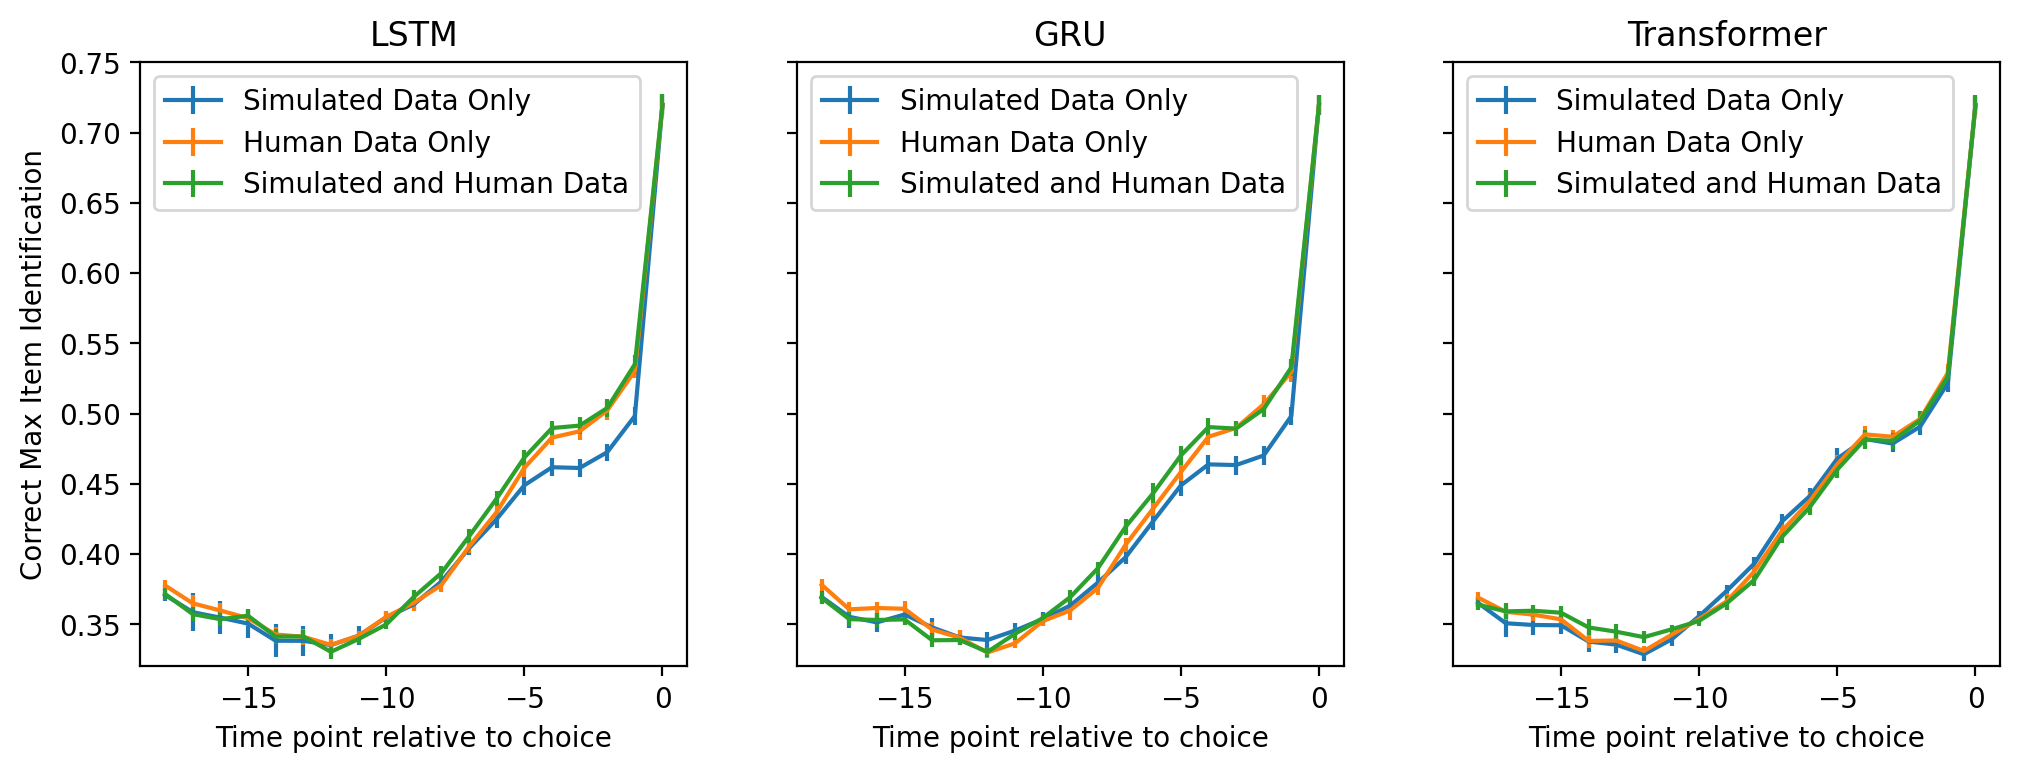

In [13]:
fig,ax = plt.subplots(1,3, figsize = (12,4), dpi = 200, sharex = True, sharey = True)

train_labels = ['Simulated Data Only', 'Human Data Only', 'Simulated and Human Data']

for train_idx, train_name in enumerate(train_names[1:]):

    for model_idx, model_name in enumerate(model_names):
        mn_r_by_n_back, sem_r = get_correlation_results(model_name, train_name, which_r_sim = 'pct_correct_max_human_by_n_back', n_runs = 20)

        these_tps = np.arange(-18,1,1)
        #ax[model_idx].plot(these_tps,np.flip(mn_r_by_n_back), label='fixations + choice')
        ax[model_idx].errorbar(these_tps,np.flip(mn_r_by_n_back), yerr=sem_r, label = train_labels[train_idx])

        ax[model_idx].set_title(model_name)
        ax[model_idx].set_xlabel('Time point relative to choice')
        ax[model_idx].legend()

    ax[0].set_ylabel('Correct Max Item Identification');
ax[0].set_ylim(.32, .75)

(0.32, 0.75)

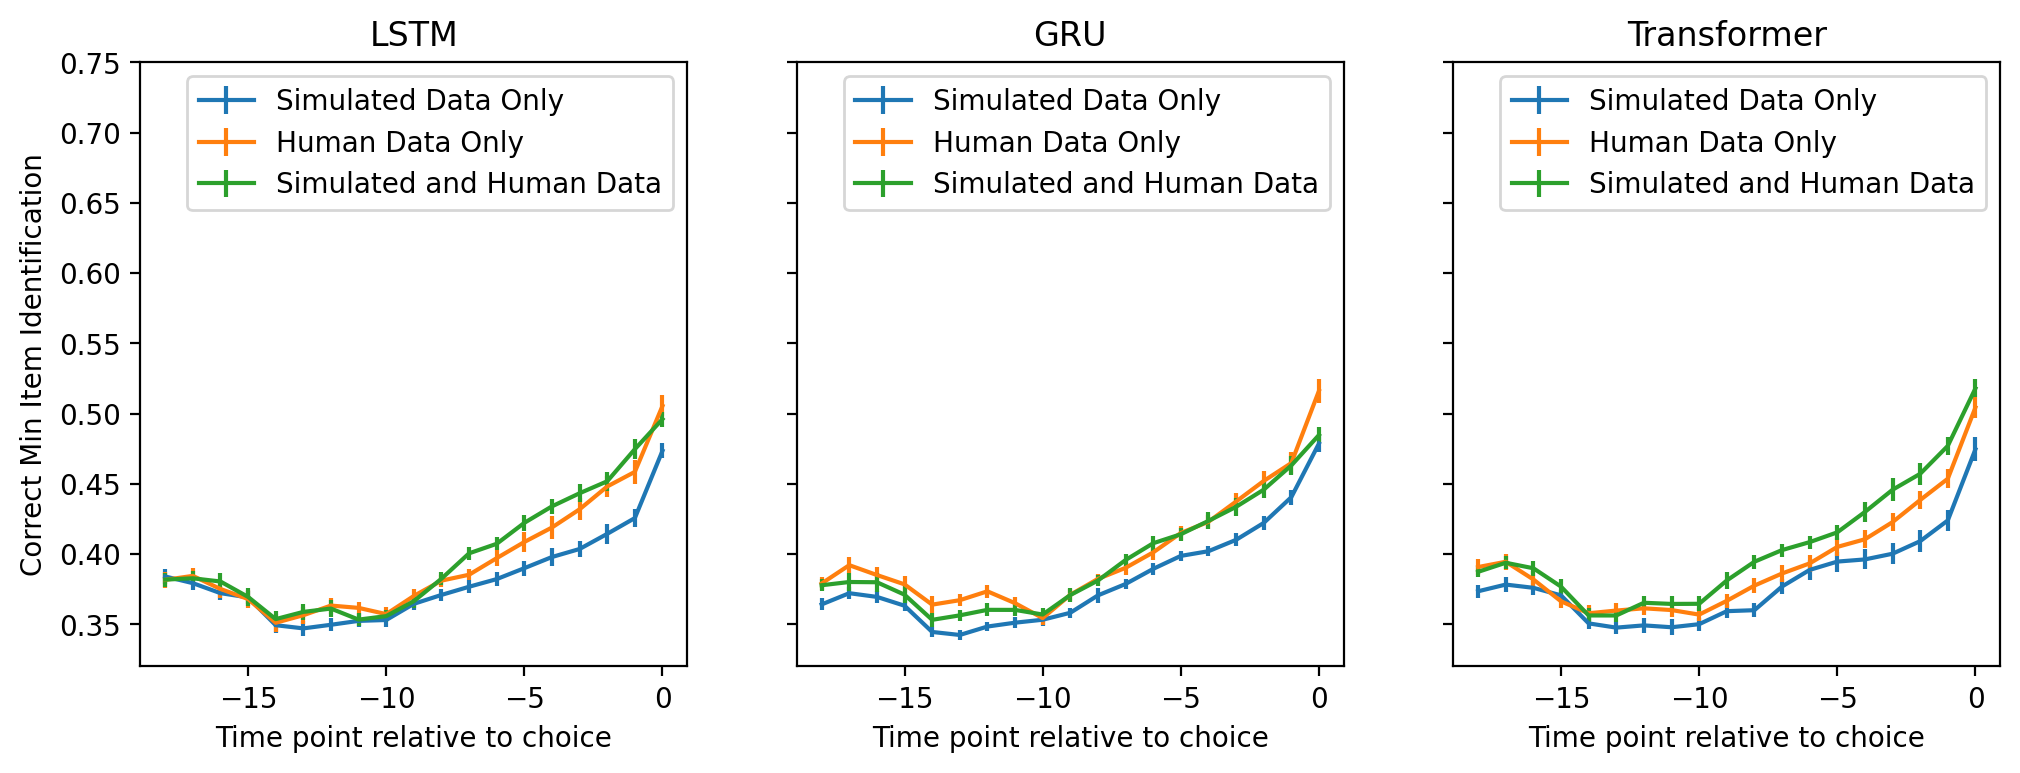

In [14]:
fig,ax = plt.subplots(1,3, figsize = (12,4), dpi = 200, sharex = True, sharey = True)

train_labels = ['Simulated Data Only', 'Human Data Only', 'Simulated and Human Data']

for train_idx, train_name in enumerate(train_names[1:]):

    for model_idx, model_name in enumerate(model_names):
        mn_r_by_n_back, sem_r = get_correlation_results(model_name, train_name, which_r_sim = 'pct_correct_min_human_by_n_back', n_runs = 20)

        these_tps = np.arange(-18,1,1)
        #ax[model_idx].plot(these_tps,np.flip(mn_r_by_n_back), label='fixations + choice')
        ax[model_idx].errorbar(these_tps,np.flip(mn_r_by_n_back), yerr=sem_r, label = train_labels[train_idx])

        ax[model_idx].set_title(model_name)
        ax[model_idx].set_xlabel('Time point relative to choice')
        ax[model_idx].legend()

ax[0].set_ylabel('Human Test Data Accuracy \n (Pearson correlation coefficient)');
ax[0].set_ylabel('Correct Min Item Identification');

ax[0].set_ylim(.32, .75)